## Import modules and scoring pd mapping

In [96]:
import pandas as pd
import numpy as np
from crv.io import sas
from crv.validation import quant_tests as qt
from crv.validation import summary
from crv.utils.dataframe_helper import rating_cats, scoring_cats_list, categorize
from crv.io.plotting import line_plot, scatter_plot, bar_plot
from data.rating_scoring_pds import rat_pd_dict, sco_pd_dict
pd.options.display.max_columns = None
print(sco_pd_dict)

{'A+': 0.0008, 'A': 0.00114, 'A-': 0.00158, 'B+': 0.0022, 'B': 0.00308, 'B-': 0.00429, 'C+': 0.00597, 'C': 0.00837, 'C-': 0.01169, 'D+': 0.01638, 'D': 0.02297, 'D-': 0.03196, 'E+': 0.04472, 'E': 0.063, 'E-': 0.08792, 'F+': 0.12279, 'F': 0.1719, 'F-': 0.27028, '0+': 1, '0': 1, '0-': 1, 'U': 0.025, 'M': 0.025, 'N': 0.025, 'S': 0.025, '-': 0.025}


## Load data
For each data_period:
* Filter out scoring customers
* Filter out Nordic countries
* Fill missing values
* Categorize the scoring column
* Remove observations >= '0+'
* Append to df_sco DataFrame and reset index
* printing scoring column type to check that it is categorical

In [58]:
%%time
#dfs = {}
df_sco = pd.DataFrame()
for dp in range(201112, 201701, 100):
    infile = "abt" + str(dp) + ".pkl"
    print(infile)
    path = "\\\\VDA1cs4756\\DEV_MODEL\\CRMV\\abt\\"
    #path = "C:\\Users\\n440730\\Nordea\\CRV_PYLIB - Documents\\Data\\abt\\"
    tempdf = pd.read_pickle(
        path + infile
        )
    tempdf = tempdf.loc[tempdf.model_seg_dyn == 'SCO', :]
    tempdf = tempdf.loc[tempdf.domicile.isin(['DK', 'SE', 'NO', 'FI']), :]
    tempdf['RAT'] = tempdf['RAT'].fillna(value='M')
    tempdf['sco'] = tempdf['sco'].fillna(value='M')
    tempdf = rating_cats(tempdf, 'sco', category_list=scoring_cats_list())
    tempdf = tempdf.loc[(tempdf.sco < '0+'), :]
    df_sco = df_sco.append(tempdf).reset_index(drop=True)
    print('tempdf', dp, tempdf.sco.dtype)
    print('df_sco', dp, df_sco.sco.dtype)

abt201112.pkl
tempdf 201112 category
df_sco 201112 category
abt201212.pkl
tempdf 201212 category
df_sco 201212 category
abt201312.pkl
tempdf 201312 category
df_sco 201312 category
abt201412.pkl
tempdf 201412 category
df_sco 201412 category
abt201512.pkl
tempdf 201512 category
df_sco 201512 category
abt201612.pkl
tempdf 201612 category
df_sco 201612 category
Wall time: 5min 14s


## Check memory usage

In [3]:
df_sco.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4658526 entries, 0 to 4658525
Data columns (total 18 columns):
model                 object
domicile              object
industry_group        object
data_period           float64
RAT                   object
sco                   category
B40                   object
B1                    object
B415                  float64
B419                  float64
df_2                  float64
PD                    float64
exclusion             object
segment               object
turn_asset_metric     float64
model_seg_dyn         object
model_seg             object
industry_group_new    object
dtypes: category(1), float64(6), object(11)
memory usage: 3.3 GB


## Brief description of categorical variables
We can see that 'sco' is a categorical variable, how does it work and why do we use that?

Categorical variables are very useful when we are dealing with string variables that belong to a set of categories,
for example rating grades or country codes.

The variable is changed to an int (that takes less space) and a mapping table is used to map the value to the original variable object.

We can also order categorical variable so that they can be compared (as seen above).

In [4]:
df_sco.RAT.head()

0    M
1    M
2    M
3    M
4    M
Name: RAT, dtype: object

In [5]:
df_sco.sco.head()

0    C-
1    D-
2    D+
3    D+
4    C-
Name: sco, dtype: category
Categories (23, object): [A+ < A < A- < B+ ... 0 < 0- < U < nan]

In [6]:
df_sco.sco.cat.codes.head()

0     8
1    11
2     9
3     9
4     8
dtype: int8

In [7]:
dict(enumerate(df_sco['sco'].cat.categories ))

{0: 'A+',
 1: 'A',
 2: 'A-',
 3: 'B+',
 4: 'B',
 5: 'B-',
 6: 'C+',
 7: 'C',
 8: 'C-',
 9: 'D+',
 10: 'D',
 11: 'D-',
 12: 'E+',
 13: 'E',
 14: 'E-',
 15: 'F+',
 16: 'F',
 17: 'F-',
 18: '0+',
 19: '0',
 20: '0-',
 21: 'U',
 22: 'nan'}

Let's see how this affect the domicile variable

In [8]:
df_sco.domicile.memory_usage(deep=True) / 1024 ** 2

262.1203556060791

In [9]:
df_sco.domicile.unique()

array(['DK', 'SE', 'NO', 'FI'], dtype=object)

In [10]:
df_sco.domicile = df_sco.domicile.astype('category')

In [11]:
df_sco.domicile.memory_usage(deep=True) / 1024 ** 2

4.443170547485352

## Categorise columns to reduce memory usage

In [12]:
%%time
df_sco = categorize(df_sco)

Wall time: 14.3 s


In [13]:
df_sco.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4658526 entries, 0 to 4658525
Data columns (total 18 columns):
model                 category
domicile              category
industry_group        category
data_period           float64
RAT                   category
sco                   category
B40                   category
B1                    category
B415                  float64
B419                  float64
df_2                  float64
PD                    float64
exclusion             category
segment               category
turn_asset_metric     float64
model_seg_dyn         category
model_seg             category
industry_group_new    category
dtypes: category(12), float64(6)
memory usage: 394.4 MB


In [14]:
df_sco.df_2.unique()

array([0., 1.])

In [15]:
df_sco.df_2 = df_sco.df_2.astype('bool')

In [16]:
df_sco.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4658526 entries, 0 to 4658525
Data columns (total 18 columns):
model                 category
domicile              category
industry_group        category
data_period           float64
RAT                   category
sco                   category
B40                   category
B1                    category
B415                  float64
B419                  float64
df_2                  bool
PD                    float64
exclusion             category
segment               category
turn_asset_metric     float64
model_seg_dyn         category
model_seg             category
industry_group_new    category
dtypes: bool(1), category(12), float64(5)
memory usage: 363.3 MB


## Map scoring PDs to scores

In [17]:
df_sco['PD_sco'] = df_sco['sco'].map(sco_pd_dict)

In [18]:
df_sco.head()

model domicile                             industry_group  data_period RAT  \
0   CRM       DK               OTHER FINANCIAL INSTITUTIONS     201112.0   M   
1   CRM       DK               CONSTRUCTION AND ENGINEERING     201112.0   M   
2   CRM       DK                                    Missing     201112.0   M   
3   CRM       DK  CONSUMER DURABLES (FOOD, AGRICULTURE ETC)     201112.0   M   
4    HH       DK    UTILITIES (DISTRIBUTION AND PRODUCTION)     201112.0   M   

  sco B40          B1           B415           B419   df_2       PD  \
0  C-  DK  A000000060            NaN            NaN  False  0.01169   
1  D-  DK  A000000065            NaN            NaN  False  0.03196   
2  D+  DK  A000000184  109928.728782  225024.056388  False  0.01638   
3  D+  DK  A000000321  107661.522423  180360.223023  False  0.01638   
4  C-  DK  A000000422            NaN            NaN  False  0.01169   

                                  exclusion segment  turn_asset_metric  \
0  _missing exposure_missing limit_Not FIRB      SC       2.106930e+06   
1  _missing exposure_missing limit_Not FIRB    MISS       2.539746e+06   
2                                       nan    MISS                NaN   
3                                       nan    MISS                NaN   
4  _missing exposure_missing limit_Not FIRB    MISS                NaN   

  model_seg_dyn model_seg industry_group_new   PD_sco  
0           SCO       SCO               FinI  0.01169  
1           SCO       SCO               Indu  0.03196  
2           SCO       PER               MISS  0.01638  
3           SCO       PER               Agri  0.01638  
4           SCO       SCO               U&PS  0.01169

## Convert data_period to a date variable

In [19]:
#df_sco['data_period'] = df_sco['data_period'].astype(int)
df_sco['dp'] = (pd.to_datetime(arg=df_sco['data_period']
                               .astype(int)
                               .astype(str), 
                               format='%Y%m') + pd.tseries.offsets.MonthEnd()
               ).dt.date
#df_sco['dp'] = df_sco['dp'].dt.date

## Create summary table grouped by data_period

In [20]:
sum_sco_tot = (
    df_sco.groupby(['dp'])
    .agg({'B1':'count', 'PD_sco':'mean', 'df_2':'mean', 'B415':'sum', 'B419':'sum'})
    .reset_index()
    .rename(columns={'df_2':'ADF'})
)
sum_sco_tot

dp      B1    PD_sco       ADF          B415          B419
0  2011-12-31  916136  0.022523  0.005957  4.097840e+09  1.062166e+10
1  2012-12-31  902440  0.020948  0.005908  5.583639e+09  1.086471e+10
2  2013-12-31  906056  0.020089  0.005588  5.704713e+09  1.041613e+10
3  2014-12-31  654593  0.021523  0.004513  4.111030e+09  8.011203e+09
4  2015-12-31  648530  0.021444  0.004168  4.003469e+09  7.945755e+09
5  2016-12-31  630771  0.022221  0.003564  3.517791e+09  7.373455e+09

C:\tools\anaconda3\5.3.0\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


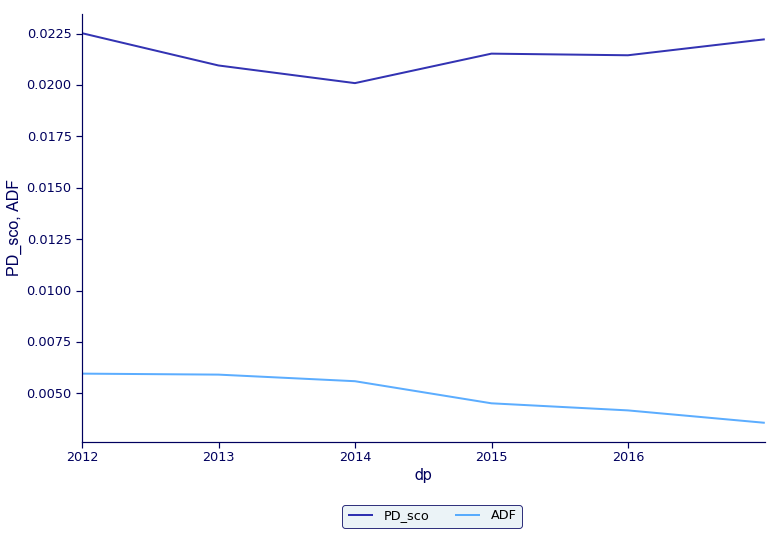

In [21]:
line_plot(sum_sco_tot, 'dp', ['PD_sco', 'ADF'])

In [ ]:
help(line_plot)

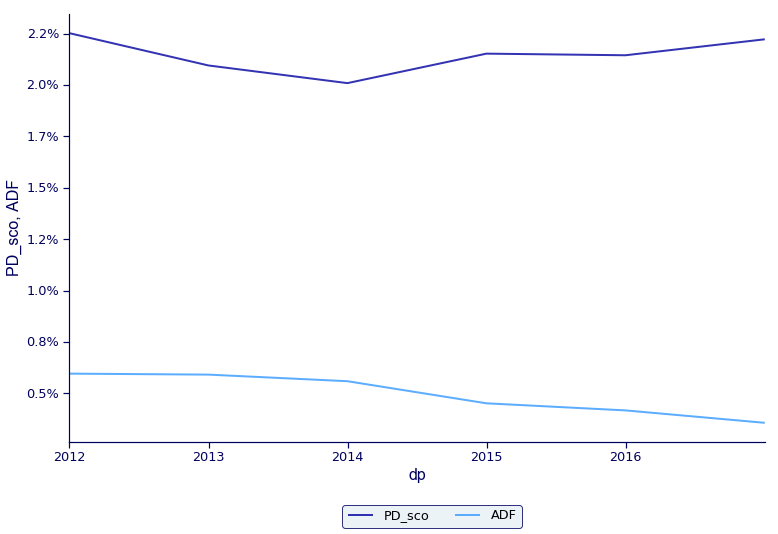

In [22]:
line_plot(sum_sco_tot, 'dp', ['PD_sco', 'ADF'], 
          y_format='percent')

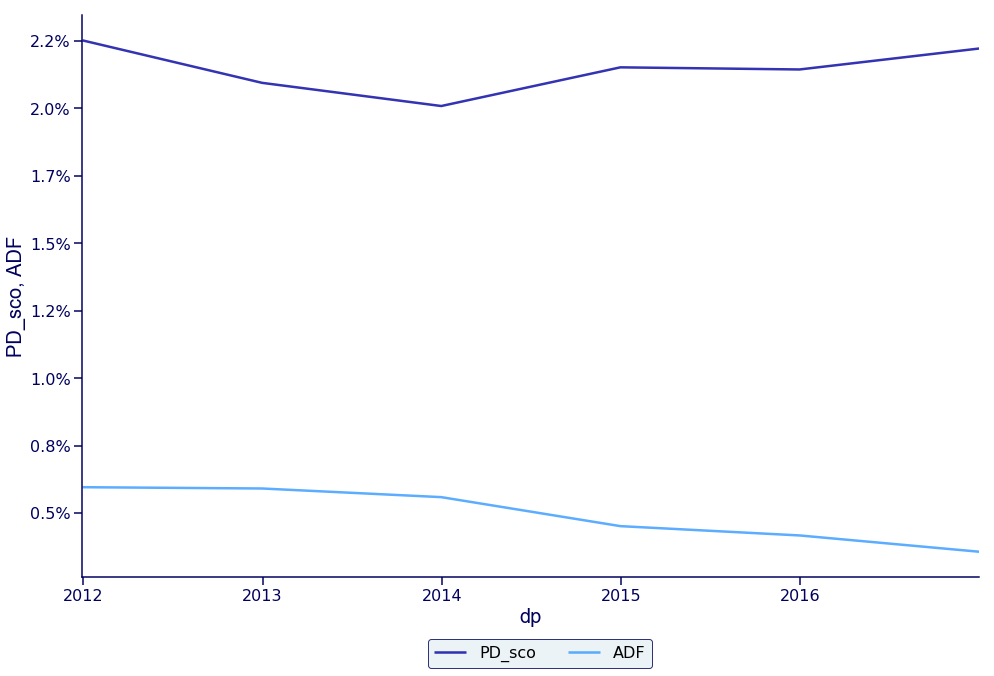

In [23]:
line_plot(sum_sco_tot, 'dp', ['PD_sco', 'ADF'], 
          y_format='percent', 
          figsize = (15,10))

## Create summary table split on domicile

In [24]:
sum_sco_dom = (df_sco.groupby(['dp', 'domicile'])
               .agg({'PD_sco':'mean', 'df_2':'mean', 'B415':'sum', 'B419':'sum', 'B1':'count'})
               .reset_index()
               .rename(columns={'df_2':'ADF'})
)

In [25]:
sum_sco_dom

dp domicile    PD_sco       ADF          B415          B419  \
0   2011-12-31       DK  0.026828  0.009986  1.805074e+09  3.087999e+09   
1   2011-12-31       FI  0.023178  0.007780  2.071022e+09  2.614813e+09   
2   2011-12-31       NO  0.018989  0.002686 -1.779094e+09  1.460967e+09   
3   2011-12-31       SE  0.022126  0.004044  2.000837e+09  3.457884e+09   
4   2012-12-31       DK  0.030443  0.008203  1.693989e+09  2.948419e+09   
5   2012-12-31       FI  0.024193  0.007786  2.005793e+09  2.540631e+09   
6   2012-12-31       NO  0.020501  0.003153 -5.942645e+08  1.401384e+09   
7   2012-12-31       SE  0.014929  0.003826  2.478122e+09  3.974275e+09   
8   2013-12-31       DK  0.027187  0.007045  1.572080e+09  2.839404e+09   
9   2013-12-31       FI  0.024126  0.007404  1.935152e+09  2.538800e+09   
10  2013-12-31       NO  0.019482  0.002516 -2.721849e+08  1.150092e+09   
11  2013-12-31       SE  0.012957  0.003661  2.469666e+09  3.887832e+09   
12  2014-12-31       DK  0.029211  0.005758  1.211004e+09  2.524008e+09   
13  2014-12-31       FI  0.028346  0.005900  1.814740e+09  2.338441e+09   
14  2014-12-31       NO  0.018378  0.003332  3.253932e+08  1.196516e+09   
15  2014-12-31       SE  0.012965  0.003078  7.598923e+08  1.952237e+09   
16  2015-12-31       DK  0.022916  0.004274  1.070201e+09  2.537248e+09   
17  2015-12-31       FI  0.028103  0.004843  1.797177e+09  2.222458e+09   
18  2015-12-31       NO  0.019065  0.002455  4.178116e+08  1.251369e+09   
19  2015-12-31       SE  0.014110  0.004045  7.182795e+08  1.934679e+09   
20  2016-12-31       DK  0.022126  0.003113  7.233962e+08  2.283532e+09   
21  2016-12-31       FI  0.029277  0.005188  1.863649e+09  2.421579e+09   
22  2016-12-31       NO  0.020028  0.002402  4.489902e+08  1.053550e+09   
23  2016-12-31       SE  0.013758  0.002061  4.817560e+08  1.614795e+09   

        B1  
0    60087  
1   414507  
2   113177  
3   328365  
4    59737  
5   425625  
6   100844  
7   316234  
8    62169  
9   440818  
10  100145  
11  302924  
12   59052  
13  268135  
14   95734  
15  231672  
16   69959  
17  263281  
18   92049  
19  223241  
20   77091  
21  267936  
22   85337  
23  200407

In [26]:
sum_sco_dom.loc[sum_sco_dom['domicile'] == 'SE']

dp domicile    PD_sco       ADF          B415          B419  \
3   2011-12-31       SE  0.022126  0.004044  2.000837e+09  3.457884e+09   
7   2012-12-31       SE  0.014929  0.003826  2.478122e+09  3.974275e+09   
11  2013-12-31       SE  0.012957  0.003661  2.469666e+09  3.887832e+09   
15  2014-12-31       SE  0.012965  0.003078  7.598923e+08  1.952237e+09   
19  2015-12-31       SE  0.014110  0.004045  7.182795e+08  1.934679e+09   
23  2016-12-31       SE  0.013758  0.002061  4.817560e+08  1.614795e+09   

        B1  
3   328365  
7   316234  
11  302924  
15  231672  
19  223241  
23  200407

## Plot split into different subplots

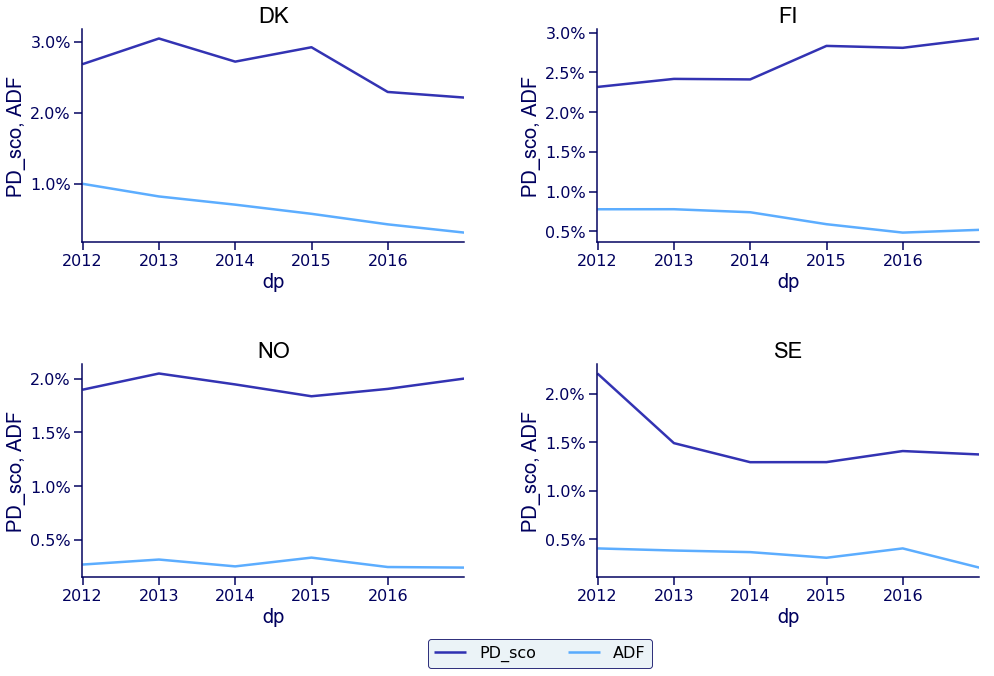

In [27]:
line_plot(sum_sco_dom, 'dp', ['PD_sco', 'ADF'], 
          split_col = 'domicile', 
          subplot_by='split_col', 
          y_format='percent',
          text_scale=1, 
          figsize = (15,10))

## Share x-axis and y-axis

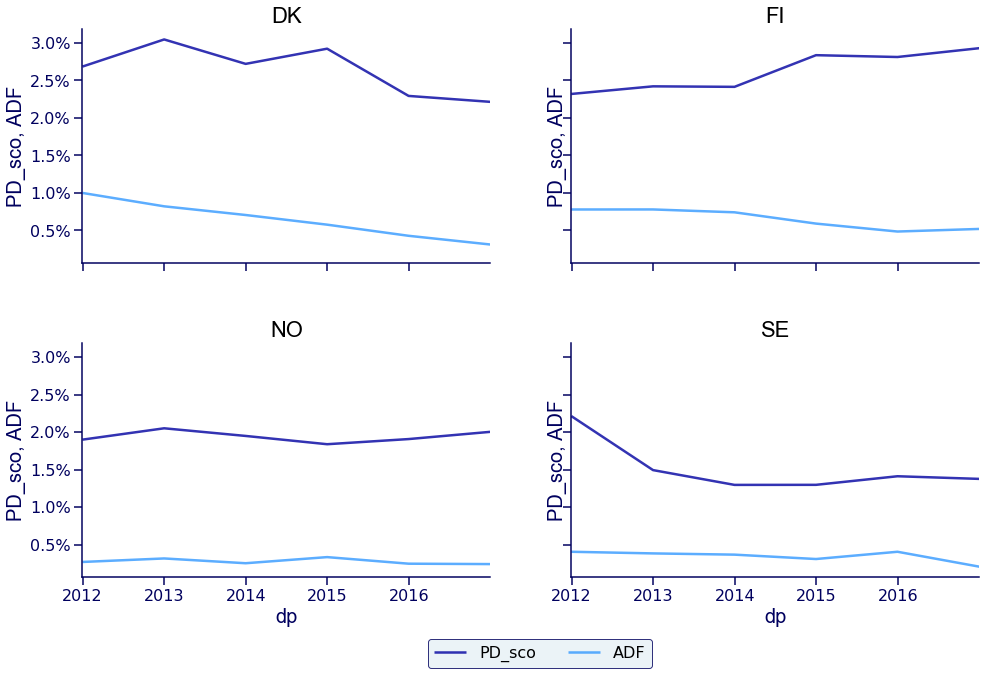

In [28]:
line_plot(sum_sco_dom, 'dp', ['PD_sco', 'ADF'], 
          split_col = 'domicile', 
          subplot_by='split_col', 
          share_x=True,
          share_y=True,
          y_format='percent',
          text_scale=1, 
          figsize = (15,10))

## Split by y vars

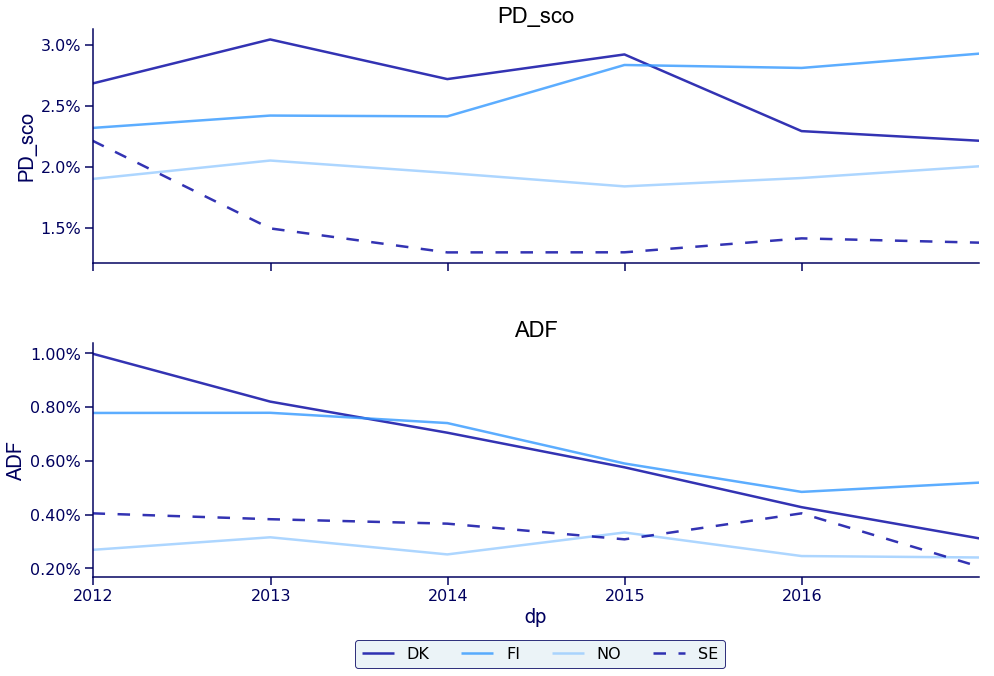

In [29]:
line_plot(sum_sco_dom, 'dp', ['PD_sco', 'ADF'], 
          split_col = 'domicile', 
          subplot_by='y_cols', 
          share_x=True,
          y_format='percent',
          text_scale=1, 
          figsize = (15,10))

## CRV_PYLIB validation functionality

#### Create an adf object with the AdfSummary class

In [30]:
%%time
adf_sco = qt.AdfSummary(df_sco, 'PD_sco', 'df_2', 'B1', 
                    group_list='sco', sum_list=['B415', 'B419'])

Wall time: 2.71 s


#### Method 1: summary_table()

In [31]:
summary_table_sco = adf_sco.summary_table()
summary_table_sco

sco       N     D       PD       ADF          B415          B419
0   A+  122951   276  0.00080  0.002245  2.118563e+09  3.068918e+09
1    A   16086    29  0.00114  0.001803  2.556532e+08  4.706219e+08
2   A-    6035    16  0.00158  0.002651  2.209298e+08  4.134066e+08
3   B+   14274    29  0.00220  0.002032  2.075055e+08  4.596885e+08
4    B  150934   529  0.00308  0.003505  1.106281e+09  1.770868e+09
5   B-  159431   328  0.00429  0.002057  3.827314e+08  2.300568e+09
6   C+  192073   427  0.00597  0.002223  1.224367e+09  4.657732e+09
7    C  182234   492  0.00837  0.002700  2.980998e+09  7.187351e+09
8   C-  308791  1479  0.01169  0.004790  4.267717e+09  9.149218e+09
9   D+  347028  1287  0.01638  0.003709  4.158068e+09  6.599385e+09
10   D  112911  1423  0.02297  0.012603  3.153569e+09  4.945328e+09
11  D-  404660  3616  0.03196  0.008936  2.344019e+09  3.663520e+09
12  E+   96056  1573  0.04472  0.016376 -1.287626e+09  3.314781e+09
13   E   40083  2030  0.06300  0.050645  2.008875e+09  2.680375e+09
14  E-   15605  1121  0.08792  0.071836  1.037179e+09  1.223245e+09
15  F+   10195   947  0.12279  0.092889  8.014330e+08  9.179773e+08
16   F   13325  1491  0.17190  0.111895  6.774928e+08  8.043318e+08
17  F-   33289  5803  0.27028  0.174322  1.360726e+09  1.605597e+09

#### Plot the adf object's summary table

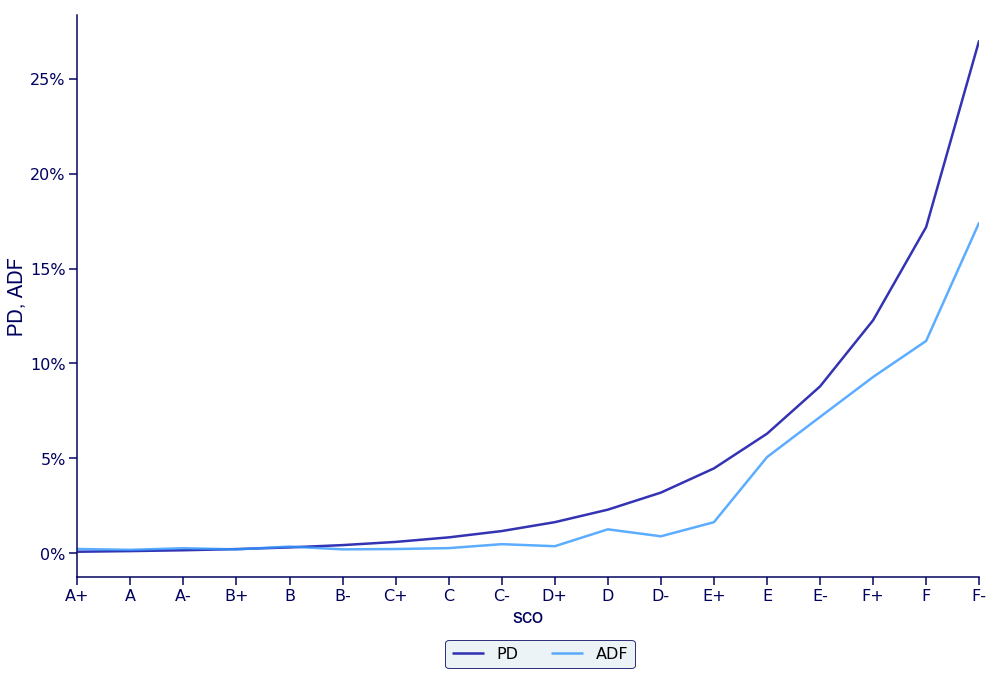

In [32]:
line_plot(summary_table_sco, 'sco', ['PD', 'ADF'], 
          y_format='percent',
          figsize=(15, 10))

#### Log plot

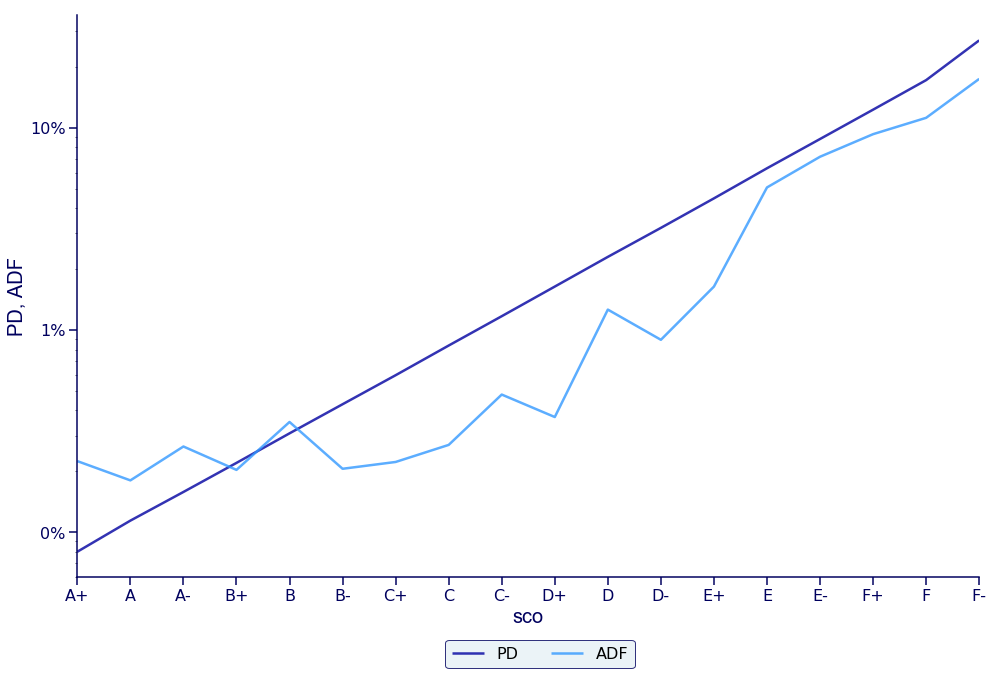

In [33]:
line_plot(summary_table_sco, 'sco', ['PD', 'ADF'], 
          y_scale='log', 
          y_format='percent',
          figsize=(15, 10))

#### Method 2: Jeffreys test

In [34]:
adf_sco.jeffreys_test(summary_row=True)

sco        N      D        PD       ADF       p-value  Passed
0   All  2225961  22896  0.022252  0.010286  1.000000e+00    True
1    A+   122951    276  0.000800  0.002245  5.821427e-49   False
2     A    16086     29  0.001140  0.001803  9.886234e-03   False
3    A-     6035     16  0.001580  0.002651  2.515188e-02   False
4    B+    14274     29  0.002200  0.002032  6.571641e-01    True
5     B   150934    529  0.003080  0.003505  1.741507e-03   False
6    B-   159431    328  0.004290  0.002057  1.000000e+00    True
7    C+   192073    427  0.005970  0.002223  1.000000e+00    True
8     C   182234    492  0.008370  0.002700  1.000000e+00    True
9    C-   308791   1479  0.011690  0.004790  1.000000e+00    True
10   D+   347028   1287  0.016380  0.003709  1.000000e+00    True
11    D   112911   1423  0.022970  0.012603  1.000000e+00    True
12   D-   404660   3616  0.031960  0.008936  1.000000e+00    True
13   E+    96056   1573  0.044720  0.016376  1.000000e+00    True
14    E    40083   2030  0.063000  0.050645  1.000000e+00    True
15   E-    15605   1121  0.087920  0.071836  1.000000e+00    True
16   F+    10195    947  0.122790  0.092889  1.000000e+00    True
17    F    13325   1491  0.171900  0.111895  1.000000e+00    True
18   F-    33289   5803  0.270280  0.174322  1.000000e+00    True

#### Method 3: Binomial test (with normal approximation)

In [35]:
adf_sco.binomial_test_norm_approx(summary_row=True)

sco        N      D        PD       ADF           k_L           k_H  \
0   All  2225961  22896  0.022252  0.010286  49100.315796  49962.962464   
1    A+   122951    276  0.000800  0.002245     78.930239    117.791361   
2     A    16086     29  0.001140  0.001803      9.949684     26.726396   
3    A-     6035     16  0.001580  0.002651      3.487855     15.582745   
4    B+    14274     29  0.002200  0.002032     20.431603     42.373997   
5     B   150934    529  0.003080  0.003505    422.683065    507.070375   
6    B-   159431    328  0.004290  0.002057    632.810884    735.107096   
7    C+   192073    427  0.005970  0.002223   1080.504739   1212.846881   
8     C   182234    492  0.008370  0.002700   1449.073068   1601.524092   
9    C-   308791   1479  0.011690  0.004790   3492.699852   3726.833728   
10   D+   347028   1287  0.016380  0.003709   5537.763527   5830.873753   
11    D   112911   1423  0.022970  0.012603   2494.903500   2692.227840   
12   D-   404660   3616  0.031960  0.008936  12713.631260  13152.235940   
13   E+    96056   1573  0.044720  0.016376   4170.071469   4421.177171   
14    E    40083   2030  0.063000  0.050645   2429.890510   2620.567490   
15   E-    15605   1121  0.087920  0.071836   1302.658553   1441.324647   
16   F+    10195    947  0.122790  0.092889   1186.894673   1316.793427   
17    F    13325   1491  0.171900  0.111895   2205.206198   2375.928802   
18   F-    33289   5803  0.270280  0.174322   8838.538836   9156.163004   

         LCL       UCL  Passed  
0   0.022058  0.022446   False  
1   0.000642  0.000958   False  
2   0.000619  0.001661   False  
3   0.000578  0.002582   False  
4   0.001431  0.002969    True  
5   0.002800  0.003360   False  
6   0.003969  0.004611   False  
7   0.005625  0.006315   False  
8   0.007952  0.008788   False  
9   0.011311  0.012069   False  
10  0.015958  0.016802   False  
11  0.022096  0.023844   False  
12  0.031418  0.032502   False  
13  0.043413  0.046027   False  
14  0.060621  0.065379   False  
15  0.083477  0.092363   False  
16  0.116419  0.129161   False  
17  0.165494  0.178306   False  
18  0.265509  0.275051   False

#### Method 4: Binomial test (without normal approximation)

In [36]:
adf_sco.binomial_test(summary_row=True)

sco        N      D        PD       ADF    k_L    k_H       LCL       UCL  \
0   All  2225961  22896  0.022252  0.010286  49101  49963  0.022058  0.022446   
1    A+   122951    276  0.000800  0.002245     79    118  0.000643  0.000960   
2     A    16086     29  0.001140  0.001803     10     27  0.000622  0.001678   
3    A-     6035     16  0.001580  0.002651      4     16  0.000663  0.002651   
4    B+    14274     29  0.002200  0.002032     21     43  0.001471  0.003012   
5     B   150934    529  0.003080  0.003505    423    508  0.002803  0.003366   
6    B-   159431    328  0.004290  0.002057    633    736  0.003970  0.004616   
7    C+   192073    427  0.005970  0.002223   1081   1213  0.005628  0.006315   
8     C   182234    492  0.008370  0.002700   1450   1602  0.007957  0.008791   
9    C-   308791   1479  0.011690  0.004790   3493   3727  0.011312  0.012070   
10   D+   347028   1287  0.016380  0.003709   5538   5831  0.015958  0.016803   
11    D   112911   1423  0.022970  0.012603   2495   2693  0.022097  0.023851   
12   D-   404660   3616  0.031960  0.008936  12714  13153  0.031419  0.032504   
13   E+    96056   1573  0.044720  0.016376   4171   4422  0.043423  0.046036   
14    E    40083   2030  0.063000  0.050645   2430   2621  0.060624  0.065389   
15   E-    15605   1121  0.087920  0.071836   1303   1442  0.083499  0.092406   
16   F+    10195    947  0.122790  0.092889   1187   1317  0.116430  0.129181   
17    F    13325   1491  0.171900  0.111895   2206   2376  0.165553  0.178311   
18   F-    33289   5803  0.270280  0.174322   8839   9156  0.265523  0.275046   

    Passed  
0    False  
1    False  
2    False  
3     True  
4     True  
5    False  
6    False  
7    False  
8    False  
9    False  
10   False  
11   False  
12   False  
13   False  
14   False  
15   False  
16   False  
17   False  
18   False

#### Method 5: AUC

In [37]:
adf_sco.auc()

0.7649550886341955

#### Method 6: Herfindahl index
Returns (Herfindahl index, Coefficient of variation, p-value)

Herfindahl index is a concentration measure that is a requirement from ECB

Coefficient of variance is used to calculate the HI and the p-value

p-value is returned if initial CV, to compare with, is input

In [38]:
adf_sco.herfindahl_index()

(0.23226327644830258, 0.9781782736178428, None)

In [39]:
adf_sco.herfindahl_index(CV_init=0.9)

(0.23226327644830258, 0.9781782736178428, 0.3924205599570465)

#### Method 6: Confidence intervals (with asset correlation)

In [59]:
adf_sco.confidence_intervals()

sco       N     D       PD       ADF       LCL       UCL  Passed
0   A+  122951   276  0.00080  0.002245  0.000310  0.001574   False
1    A   16086    29  0.00114  0.001803  0.000455  0.002206    True
2   A-    6035    16  0.00158  0.002651  0.000648  0.003010    True
3   B+   14274    29  0.00220  0.002032  0.000930  0.004122    True
4    B  150934   529  0.00308  0.003505  0.001341  0.005671    True
5   B-  159431   328  0.00429  0.002057  0.001926  0.007759    True
6   C+  192073   427  0.00597  0.002223  0.002765  0.010599   False
7    C  182234   492  0.00837  0.002700  0.004005  0.014567   False
8   C-  308791  1479  0.01169  0.004790  0.005782  0.019930   False
9   D+  347028  1287  0.01638  0.003709  0.008386  0.027321   False
10   D  112911  1423  0.02297  0.012603  0.012187  0.037438    True
11  D-  404660  3616  0.03196  0.008936  0.017579  0.050860   False
12  E+   96056  1573  0.04472  0.016376  0.025553  0.069354   False
13   E   40083  2030  0.06300  0.050645  0.037490  0.094993    True
14  E-   15605  1121  0.08792  0.071836  0.054534  0.128725    True
15  F+   10195   947  0.12279  0.092889  0.079577  0.174132    True
16   F   13325  1491  0.17190  0.111895  0.116773  0.235358   False
17  F-   33289  5803  0.27028  0.174322  0.196786  0.350786   False

#### Create adf object split by country

In [41]:
%%time
adf_sco_dom = qt.AdfSummary(df_sco, 'PD_sco', 'df_2', 'B1', 
                    group_list=['domicile', 'sco'], sum_list=['B415', 'B419'])

Wall time: 2.97 s


#### Plot PD vs ADF per scoring grade, split by country

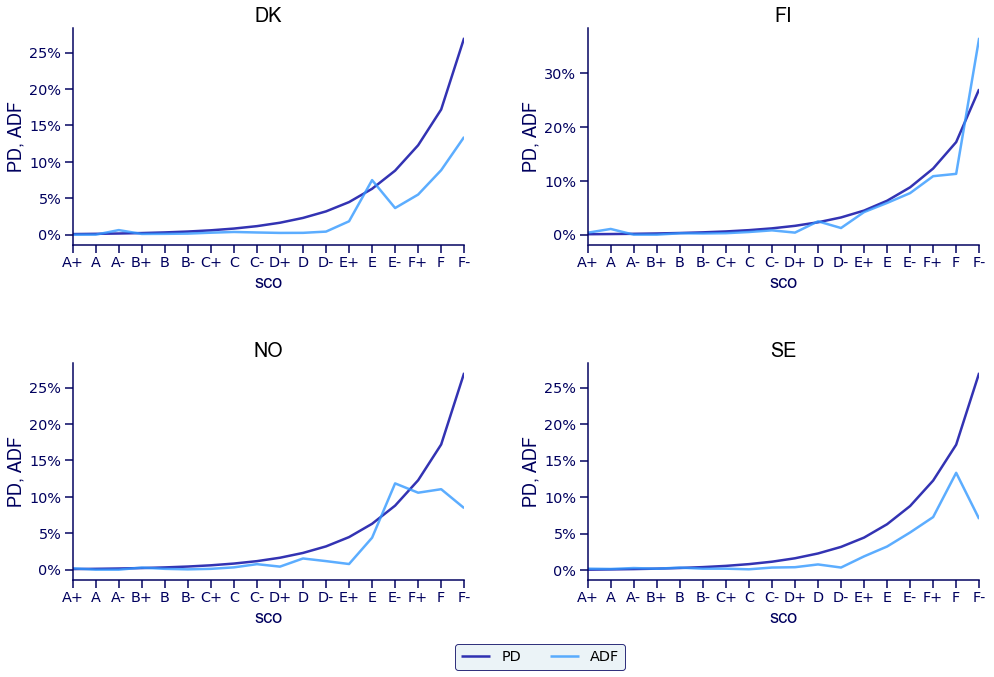

In [42]:
line_plot(adf_sco_dom.summary_table(), 'sco', ['PD', 'ADF'], 
          split_col = 'domicile', 
          subplot_by='split_col', 
          y_format='percent', 
          text_scale=0.9, 
          figsize=(15, 10))

#### Logplot PD vs ADF per scoring grade, split by country

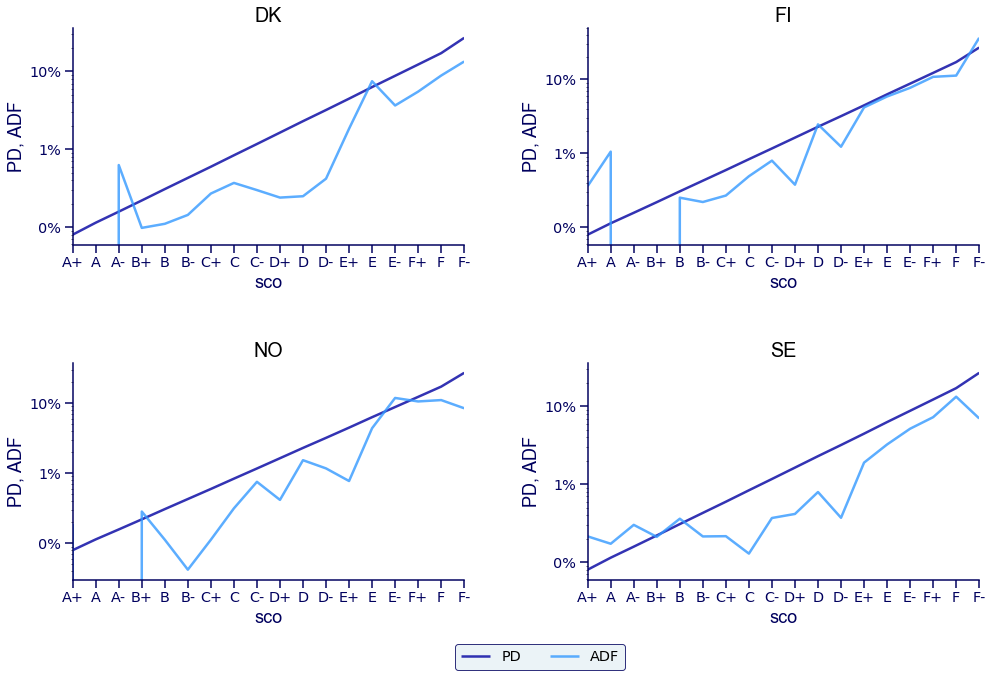

In [43]:
line_plot(adf_sco_dom.summary_table(), 'sco', ['PD', 'ADF'], 
          y_scale='log', 
          split_col = 'domicile', 
          subplot_by='split_col',
          y_format='percent', 
          text_scale=0.9, 
          figsize=(15, 10))

#### Create ADF object split by data period

In [44]:
adf_sco_dp = qt.AdfSummary(df_sco, 'PD_sco', 'df_2', 'B1', 
        group_list=['dp', 'sco'], sum_list=['B415', 'B419'])

#### Plot PD vs ADF per scoring grade, split by data period

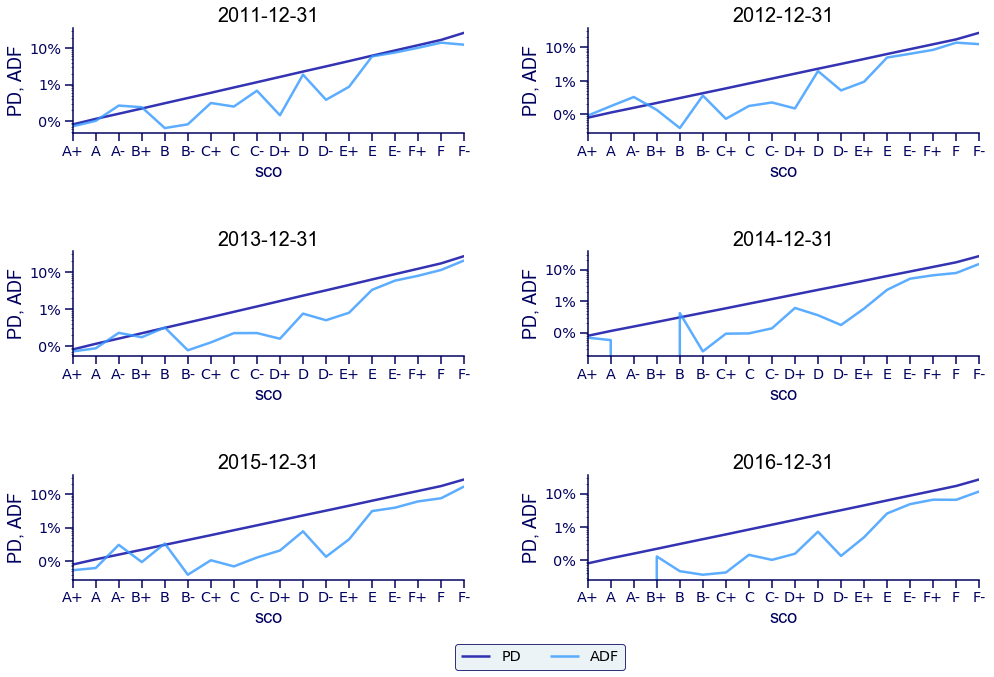

In [60]:
line_plot(adf_sco_dp.summary_table(), 'sco', ['PD', 'ADF'], 
          y_scale='log', 
          split_col = 'dp', 
          subplot_by='split_col', 
          y_format='percent', 
          text_scale=0.9, 
          figsize=(15, 10))

#### Selecting scoring grade A+

In [46]:
adf_sco_dp.summary_table()[adf_sco_dp.summary_table().sco == 'A+']

dp sco      N   D      PD       ADF          B415          B419
0   2011-12-31  A+  75974  54  0.0008  0.000711  4.686981e+08  7.964744e+08
18  2012-12-31  A+  70566  65  0.0008  0.000921  6.279246e+08  9.365706e+08
36  2013-12-31  A+  67678  48  0.0008  0.000709  6.589571e+08  7.957493e+08
54  2014-12-31  A+  69921  49  0.0008  0.000701  1.260963e+08  1.644056e+08
72  2015-12-31  A+  66361  36  0.0008  0.000542  1.313748e+08  2.330989e+08
90  2016-12-31  A+  60559  30  0.0008  0.000495  1.055119e+08  1.426196e+08

#### Plot PD vs ADF per data period, split by scoring grade

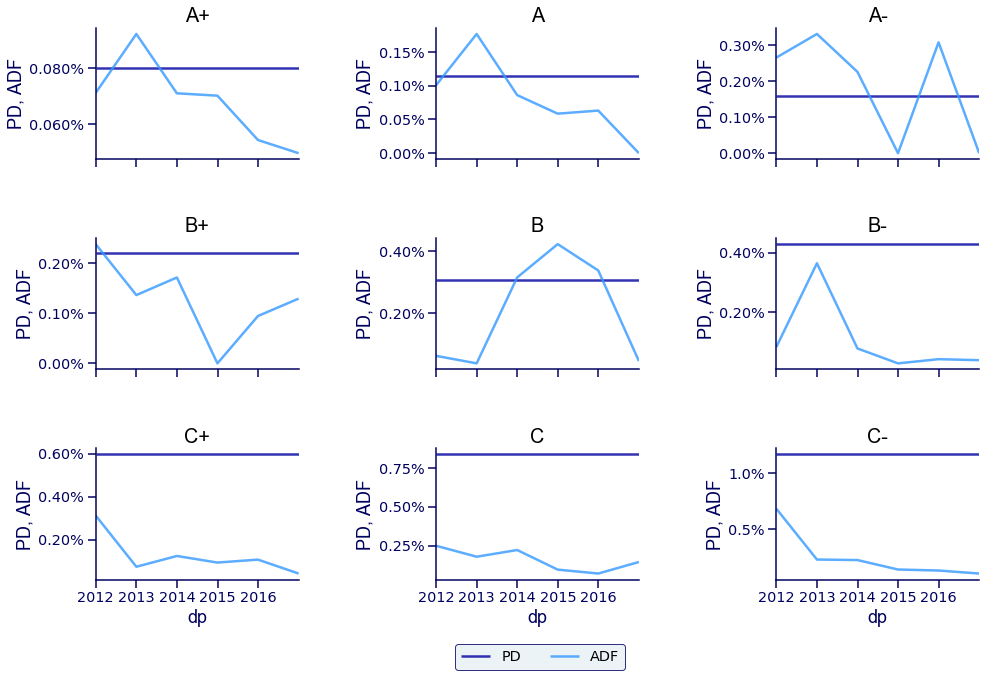

In [47]:
line_plot(adf_sco_dp.summary_table()[adf_sco_dp.summary_table().sco < 'D+'], 'dp', ['PD', 'ADF'], 
          split_col = 'sco', 
          subplot_by='split_col',
          share_x=True, 
          y_format='percent', 
          text_scale=0.9, 
          figsize=(15, 10))

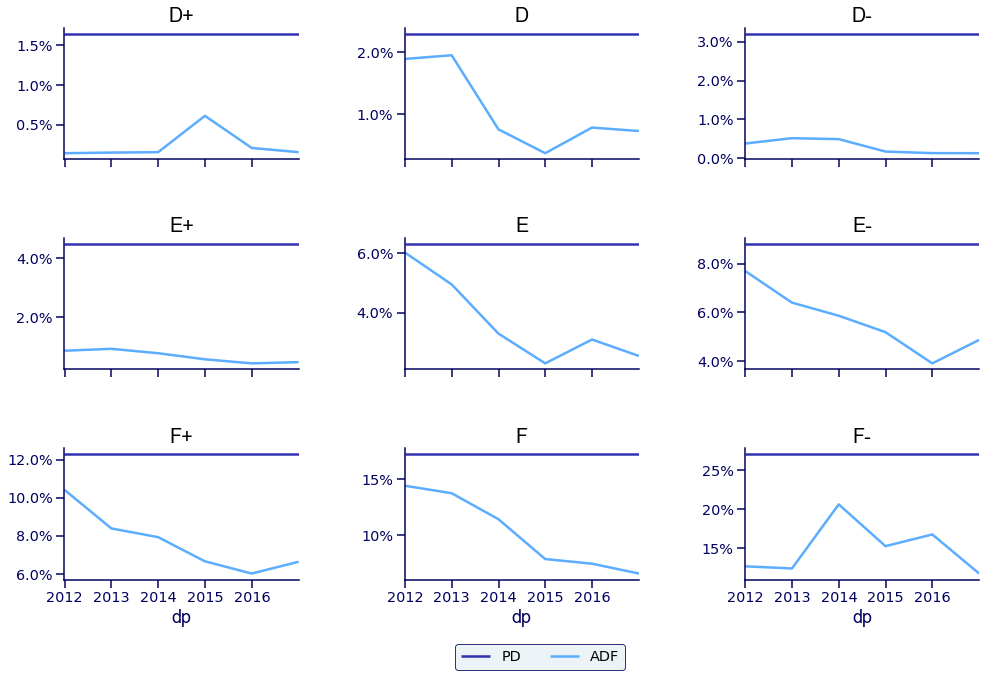

In [48]:
line_plot(adf_sco_dp.summary_table()[adf_sco_dp.summary_table().sco >= 'D+'], 'dp', ['PD', 'ADF', ], 
          split_col = 'sco', 
          subplot_by='split_col',
          share_x=True, 
          hide_axis_labels='y',
          y_format='percent', 
          text_scale=0.9, 
          figsize=(15, 10))

#### Create ADF object split on data period and country

In [49]:
adf_sco_dom_dp = qt.AdfSummary(df_sco, 'PD_sco', 'df_2', 'B1', 
        group_list=['dp', 'domicile', 'sco'], sum_list=['B415', 'B419'])

#### Logplot PD vs ADF per scoring grade for each country

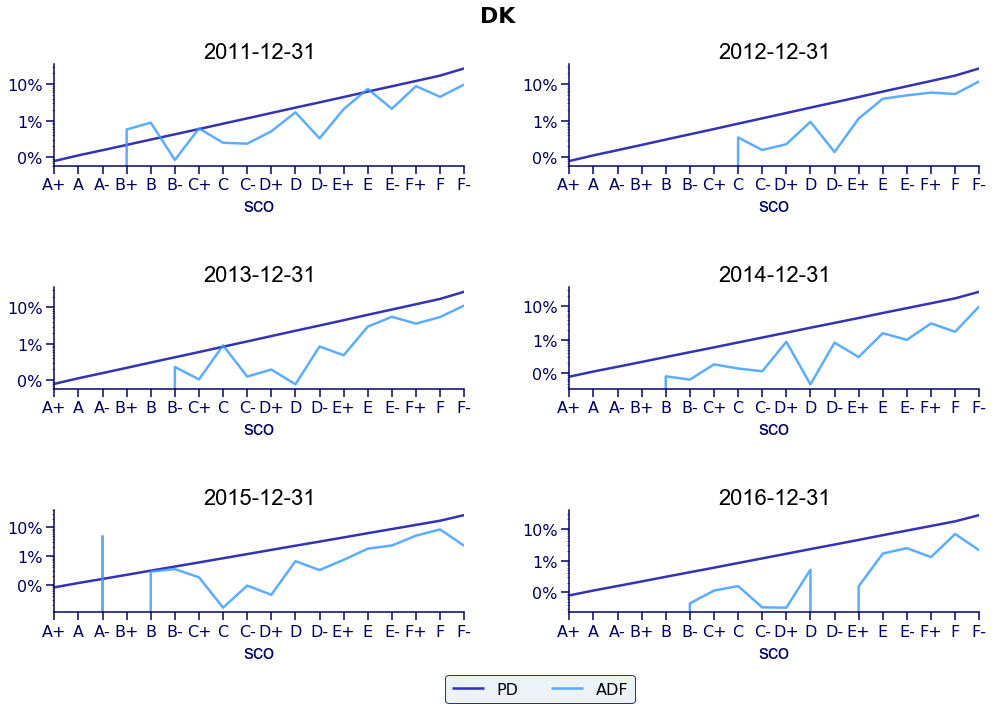

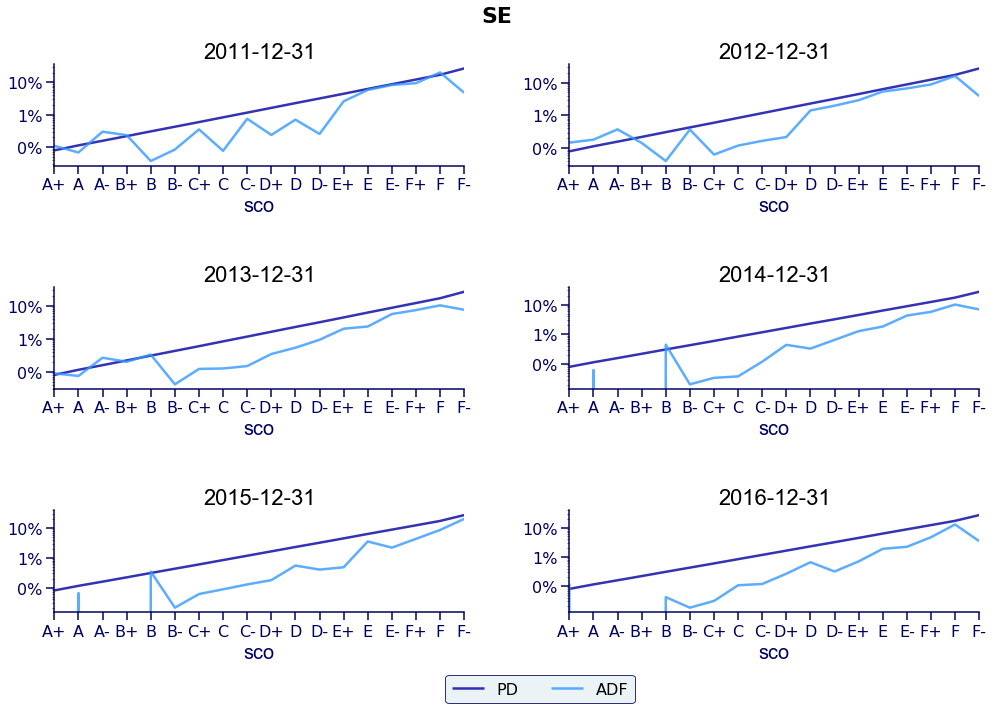

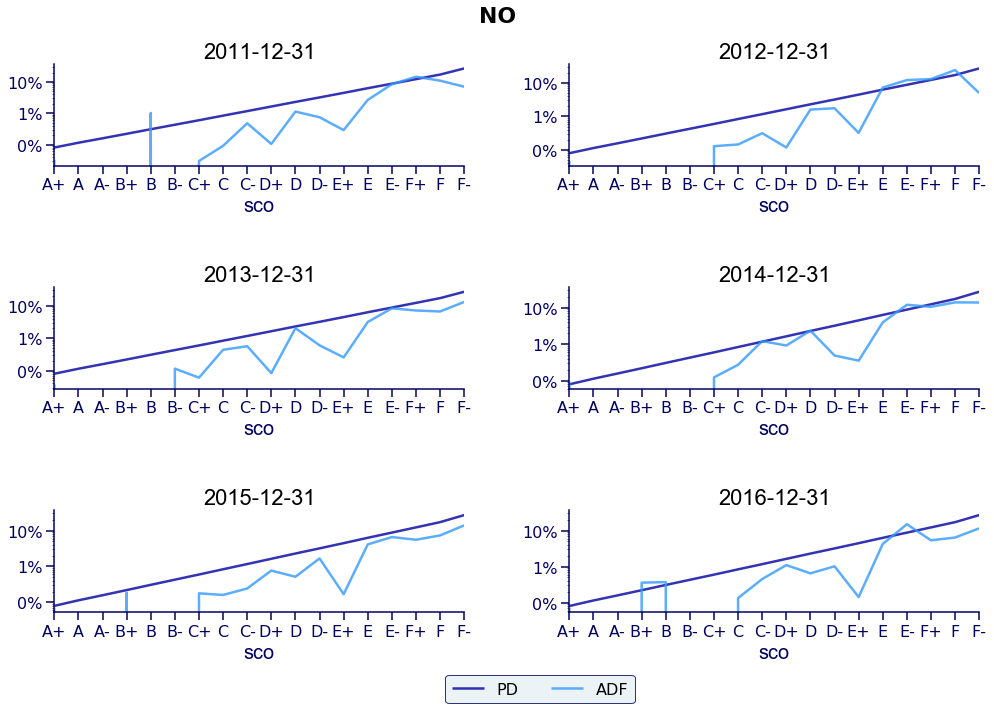

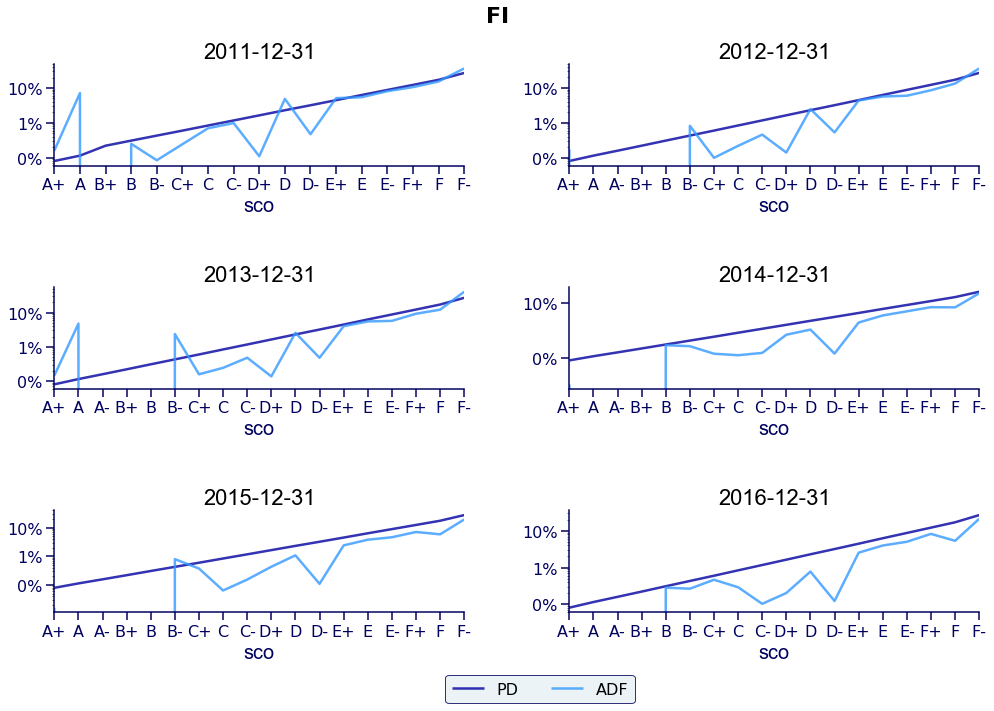

In [50]:
for c in ('DK', 'SE', 'NO', 'FI'):
    (line_plot(adf_sco_dom_dp.summary_table()
               .loc[adf_sco_dom_dp.summary_table().domicile == c, :], 
               'sco', ['PD', 'ADF'], 
               split_col='dp',
               subplot_by='split_col',
               y_format='percent', 
               hide_axis_labels='y',
               plot_title=c,
               y_scale='log',
               figsize=(15, 10)))

#### Binomial test on the ADF object split on data period and country

In [94]:
binomial_test = adf_sco_dom_dp.binomial_test()
binomial_test

dp domicile sco       N    D       PD       ADF   k_L   k_H  \
0    2011-12-31       DK  A+     453    0  0.00080  0.000000     0     2   
1    2011-12-31       DK   A      11    0  0.00114  0.000000     0     0   
2    2011-12-31       DK  A-       7    0  0.00158  0.000000     0     0   
3    2011-12-31       DK  B+     172    1  0.00220  0.005814     0     2   
4    2011-12-31       DK   B     112    1  0.00308  0.008929     0     2   
5    2011-12-31       DK  B-    1169    1  0.00429  0.000855     1    10   
6    2011-12-31       DK  C+    2252   14  0.00597  0.006217     7    21   
7    2011-12-31       DK   C    4763   12  0.00837  0.002519    28    53   
8    2011-12-31       DK  C-   14701   35  0.01169  0.002381   147   198   
9    2011-12-31       DK  D+    8682   45  0.01638  0.005183   120   166   
10   2011-12-31       DK   D    1286   22  0.02297  0.017107    19    40   
11   2011-12-31       DK  D-   19893   66  0.03196  0.003318   588   685   
12   2011-12-31       DK  E+    1677   35  0.04472  0.020871    59    92   
13   2011-12-31       DK   E    3398  253  0.06300  0.074456   187   242   
14   2011-12-31       DK  E-     234    5  0.08792  0.021368    13    29   
15   2011-12-31       DK  F+     406   36  0.12279  0.088670    37    63   
16   2011-12-31       DK   F     221   10  0.17190  0.045249    27    49   
17   2011-12-31       DK  F-     650   64  0.27028  0.098462   154   198   
18   2011-12-31       FI  A+   17515   28  0.00080  0.001599     7    22   
19   2011-12-31       FI   A      28    2  0.00114  0.071429     0     1   
20   2011-12-31       FI  B+      64    0  0.00220  0.000000     0     1   
21   2011-12-31       FI   B    1602    4  0.00308  0.002497     1    10   
22   2011-12-31       FI  B-   14292   12  0.00429  0.000840    46    77   
23   2011-12-31       FI  C+   21846   53  0.00597  0.002426   109   153   
24   2011-12-31       FI   C   18489  129  0.00837  0.006977   131   179   
25   2011-12-31       FI  C-   21055  207  0.01169  0.009831   216   277   
26   2011-12-31       FI  D+  146733  161  0.01638  0.001097  2309  2499   
27   2011-12-31       FI   D    4499  219  0.02297  0.048677    84   123   
28   2011-12-31       FI  D-  156196  735  0.03196  0.004706  4856  5129   
29   2011-12-31       FI  E+    2837  145  0.04472  0.051110   106   149   
..          ...      ...  ..     ...  ...      ...       ...   ...   ...   
401  2016-12-31       NO  C+    1816    0  0.00597  0.000000     5    18   
402  2016-12-31       NO   C    2254    3  0.00837  0.001331    11    28   
403  2016-12-31       NO  C-    1555    7  0.01169  0.004502    10    27   
404  2016-12-31       NO  D+    1365   15  0.01638  0.010989    14    32   
405  2016-12-31       NO   D    3088   20  0.02297  0.006477    55    88   
406  2016-12-31       NO  D-     688    7  0.03196  0.010174    13    31   
407  2016-12-31       NO  E+   31017   44  0.04472  0.001419  1316  1459   
408  2016-12-31       NO   E     587   25  0.06300  0.042589    26    49   
409  2016-12-31       NO  E-     146   22  0.08792  0.150685     7    20   
410  2016-12-31       NO  F+      93    5  0.12279  0.053763     6    18   
411  2016-12-31       NO   F     140    9  0.17190  0.064286    16    33   
412  2016-12-31       NO  F-     130   15  0.27028  0.115385    25    45   
413  2016-12-31       SE  A+     819    1  0.00080  0.001221     0     3   
414  2016-12-31       SE   A    4444    0  0.00114  0.000000     1    10   
415  2016-12-31       SE  A-     327    0  0.00158  0.000000     0     2   
416  2016-12-31       SE  B+     366    0  0.00220  0.000000     0     3   
417  2016-12-31       SE   B   47765   20  0.00308  0.000419   124   171   
418  2016-12-31       SE  B-    5491    1  0.00429  0.000182    15    33   
419  2016-12-31       SE  C+   22612    7  0.00597  0.000310   113   158   
420  2016-12-31       SE   C   12188   13  0.00837  0.001067    83   122   
421  2016-12-31       SE  C-   69517   82  0.01169  0.001180 

#### Binomial test on the ADF object split on data period and country

In [95]:
binomial_test.loc[(binomial_test.domicile == 'DK') & (binomial_test.dp == pd.datetime(2016, 12, 31).date()), :]

dp domicile sco      N    D       PD       ADF  k_L  k_H  \
359  2016-12-31       DK  A+    626    0  0.00080  0.000000    0    2   
360  2016-12-31       DK   A      5    0  0.00114  0.000000    0    0   
361  2016-12-31       DK  A-     11    0  0.00158  0.000000    0    0   
362  2016-12-31       DK  B+    469    0  0.00220  0.000000    0    3   
363  2016-12-31       DK   B    705    0  0.00308  0.000000    0    5   
364  2016-12-31       DK  B-   4461    2  0.00429  0.000448   11   28   
365  2016-12-31       DK  C+   3523    4  0.00597  0.001135   13   30   
366  2016-12-31       DK   C   3184    5  0.00837  0.001570   17   37   
367  2016-12-31       DK  C-  23757    8  0.01169  0.000337  246  311   
368  2016-12-31       DK  D+  30431   10  0.01638  0.000329  456  542   
369  2016-12-31       DK   D    776    4  0.02297  0.005155   10   26   
370  2016-12-31       DK  D-   1707    0  0.03196  0.000000   41   69   
371  2016-12-31       DK  E+    648    1  0.04472  0.001543   19   40   
372  2016-12-31       DK   E   4038   67  0.06300  0.016592  225  285   
373  2016-12-31       DK  E-    122    3  0.08792  0.024590    5   17   
374  2016-12-31       DK  F+    312    4  0.12279  0.012821   27   50   
375  2016-12-31       DK   F   1746  120  0.17190  0.068729  270  331   
376  2016-12-31       DK  F-    570   12  0.27028  0.021053  134  175   

          LCL       UCL  Passed  
359  0.000000  0.003195    True  
360  0.000000  0.000000    True  
361  0.000000  0.000000    True  
362  0.000000  0.006397    True  
363  0.000000  0.007092    True  
364  0.002466  0.006277   False  
365  0.003690  0.008515   False  
366  0.005339  0.011621   False  
367  0.010355  0.013091   False  
368  0.014985  0.017811   False  
369  0.012887  0.033505   False  
370  0.024019  0.040422   False  
371  0.029321  0.061728   False  
372  0.055721  0.070579   False  
373  0.040984  0.139344   False  
374  0.086538  0.160256   False  
375  0.154639  0.189576   False  
376  0.235088  0.307018   False

#### Scatter plot and bar plot functionality

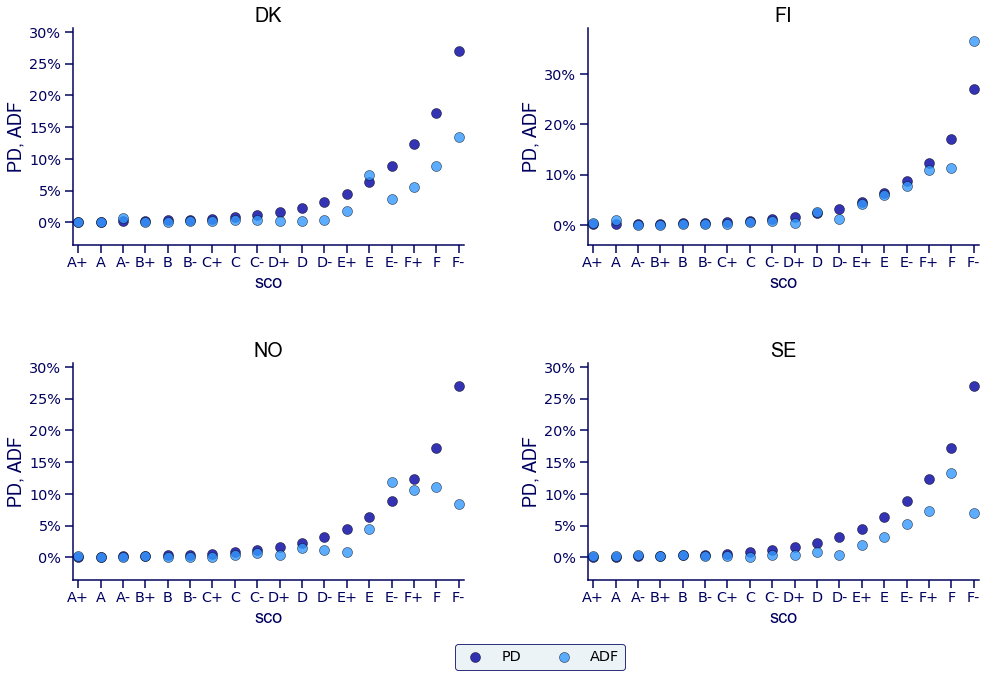

In [54]:
scatter_plot(adf_sco_dom.summary_table(), 'sco', ['PD', 'ADF'], 
          split_col = 'domicile', 
          subplot_by='split_col', 
             y_format='percent', 
          text_scale=0.9, 
          figsize=(15, 10))

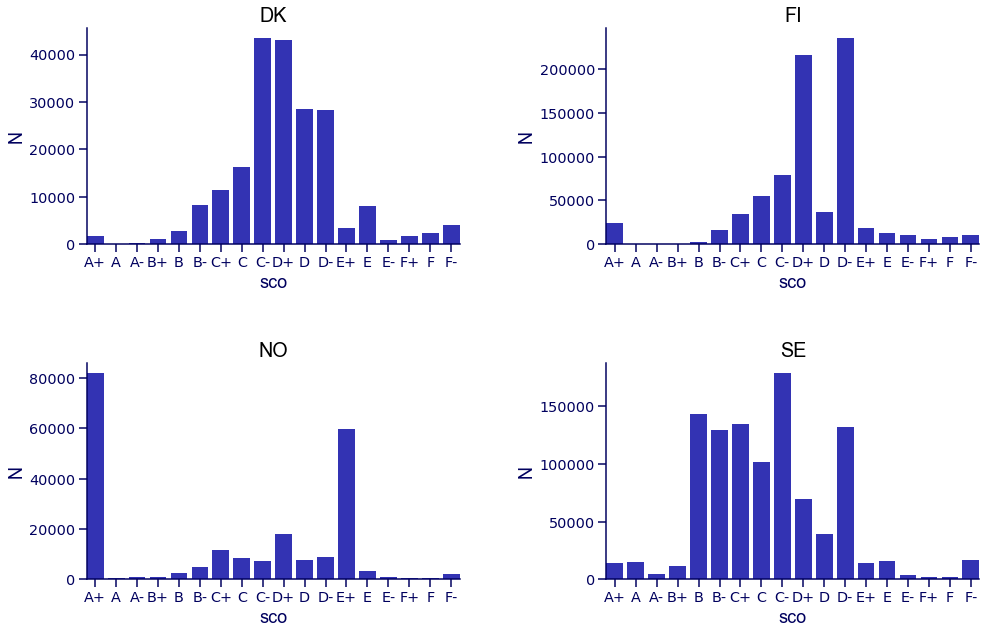

In [55]:
bar_plot(adf_sco_dom.summary_table(), 'sco', ['N'], 
          split_col = 'domicile', 
          subplot_by='split_col', 
          text_scale=0.9, 
          figsize=(15, 10))

## Migration matrix

In [56]:
%%time
migmax = qt.MigrationMatrix(df_sco.loc[df_sco.data_period == 201512], df_sco.loc[df_sco.data_period == 201612], 'B1', 'sco', 'model', 'df_2')

Wall time: 4.39 s


In [99]:
migmax.migration_matrix()

A+         A  \
A+  0.815328  0.001040   
A   0.014085  0.657347   
A-  0.044615  0.136923   
B+  0.023697  0.064455   
B   0.000489  0.002395   
B-  0.003285  0.000995   
C+  0.001610  0.003756   
C   0.003183  0.000705   
C-  0.005960  0.000428   
D+  0.007091  0.006055   
D   0.013384  0.003524   
D-  0.001530  0.001146   
E+  0.049562  0.001959   
E   0.006492  0.014352   
E-  0.006531  0.005486   
F+  0.007160  0.001909   
F   0.021283  0.000568   
F-  0.006476  0.000000   

          A-        B+  \
A+  0.000452  0.000497   
A   0.017868  0.008619   
A-  0.233846  0.187692   
B+  0.141232  0.395261   
B   0.002189  0.004455   
B-  0.001427  0.006536   
C+  0.000767  0.002338   
C   0.000583  0.003232   
C-  0.000257  0.000864   
D+  0.000117  0.000502   
D   0.000381  0.000619   
D-  0.000061  0.000146   
E+  0.000441  0.000392   
E   0.000256  0.000342   
E-  0.000261  0.000522   
F+  0.000477  0.000477   
F   0.000000  0.000000   
F-  0.001199  0.000000   

           B        B-  \
A+  0.000347  0.001688   
A   0.023544  0.004835   
A-  0.092308  0.050769   
B+  0.131754  0.051185   
B   0.339822  0.016068   
B-  0.653140  0.077773   
C+  0.055918  0.088035   
C   0.015818  0.085773   
C-  0.053005  0.005711   
D+  0.012460  0.004198   
D   0.012955  0.011097   
D-  0.002445  0.000677   
E+  0.005779  0.001249   
E   0.022894  0.004271   
E-  0.010711  0.003918   
F+  0.006205  0.002864   
F   0.041714  0.003121   
F-  0.001439  0.001679   

          C+         C  \
A+  0.000558  0.000573   
A   0.082195  0.003153   
A-  0.036923  0.023077   
B+  0.035071  0.025592   
B   0.009141  0.008626   
B-  0.035569  0.037228   
C+  0.313084  0.126207   
C   0.140858  0.145887   
C-  0.031890  0.030941   
D+  0.064526  0.036009   
D   0.041627  0.055106   
D-  0.006481  0.003079   
E+  0.015011  0.007420   
E   0.051597  0.015633   
E-  0.020637  0.012278   
F+  0.013842  0.013842   
F   0.004257  0.005959   
F-  0.069321  0.003598   

          C-        D+  \
A+  0.004958  0.015536   
A   0.041413  0.034686   
A-  0.052308  0.021538   
B+  0.020853  0.018957   
B   0.007107  0.002240   
B-  0.026079  0.009290   
C+  0.163345  0.049900   
C   0.402430  0.091824   
C-  0.642375  0.100433   
D+  0.109533  0.521960   
D   0.115641  0.131454   
D-  0.014890  0.015237   
E+  0.023948  0.024511   
E   0.112677  0.041090   
E-  0.042320  0.041014   
F+  0.064439  0.052506   
F   0.035471  0.027242   
F-  0.110098  0.020149   

           D        D-  \
A+  0.001612  0.002863   
A   0.007147  0.020811   
A-  0.013846  0.021538   
B+  0.006635  0.019905   
B   0.001828  0.001725   
B-  0.006072  0.005674   
C+  0.014985  0.034877   
C   0.026485  0.028988   
C-  0.017777  0.019341   
D+  0.092139  0.057334   
D   0.287579  0.142503   
D-  0.014432  0.879480   
E+  0.023459  0.046403   
E   0.040834  0.065607   
E-  0.051724  0.115204   
F+  0.035800  0.089737   
F   0.020431  0.118048   
F-  0.017030  0.107940   

          E+         E  \
A+  0.002080  0.000332   
A   0.023754  0.034686   
A-  0.040000  0.001538   
B+  0.025592  0.003791   
B   0.001236  0.000721   
B-  0.002522  0.002488   
C+  0.006669  0.002415   
C   0.012028  0.004228   
C-  0.005664  0.009562   
D+  0.019485  0.008931   
D   0.063345  0.029006   
D-  0.008963  0.004561   
E+  0.681571  0.023728   
E   0.110542  0.325047   
E-  0.097701  0.114420   
F+  0.084487  0.111695   
F   0.037457  0.054484   
F-  0.056129  0.115375   

          E-        F+  \
A+  0.000090  0.000045   
A   0.001261  0.000000   
A-  0.000000  0.000000   
B+  0.000000  0.000000   
B   0.000077  0.000051   
B-  0.000133  0.000265   
C+  0.000307  0.000383   
C   0.000607  0.000850   
C-  0.000778  0.001190   
D+  0.003094  0.000736   
D   0.012479  0.008049   
D-  0.002171  0.001110   
E+  0.008889  0.003698   
E   0.040834  0.017256   
E-  0.249739  0.056165   
F+  0.123628  0.149881   
F   0.026674  0.025255   
F-  0.038139  0.032382   

           F        F-  \
A+  0.000211  0.000181  